MARKETING CAMPAIGN PERFORMANCE INSIGHTS

In [40]:
# LOAD DATASET

import pandas as pd

url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [41]:
# DESCRIPTIVE ANALYSIS

# 1 Basic Structur

# Print First few rows
df.head()

# Number of rows and columns
df.shape

# Concise summary
df.info()

# Descriptive statistics
df.describe()

# 2 Data exploration

# Number of unique Campaign_ID
df['Campaign_ID'].nunique()

# Unique values of the Location and Customer_Segment
df['Location'].unique()
df['Customer_Segment'].unique()

# Count Occurrences Categorical Columns
df['Campaign_Type'].value_counts()
df['Channel_Used'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64

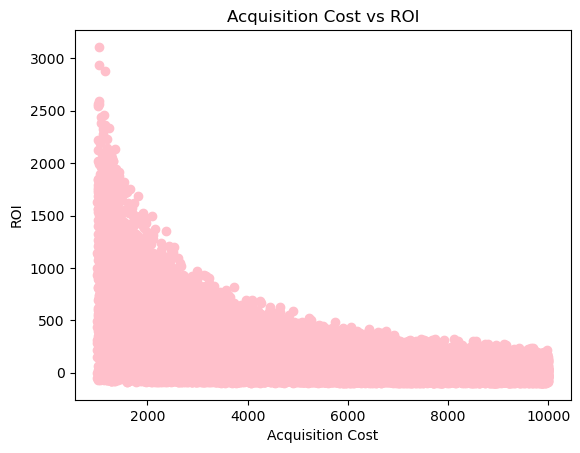

In [42]:
# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

# Campaign Performance

# a) Scatter plot : Acquisition_Cost Vs ROI

import matplotlib.pyplot as plt

plt.scatter(df['Acquisition_Cost'], df['ROI'], color=['pink'])
plt.xlabel("Acquisition Cost")
plt.ylabel("ROI")
plt.title("Acquisition Cost vs ROI")
plt.show()


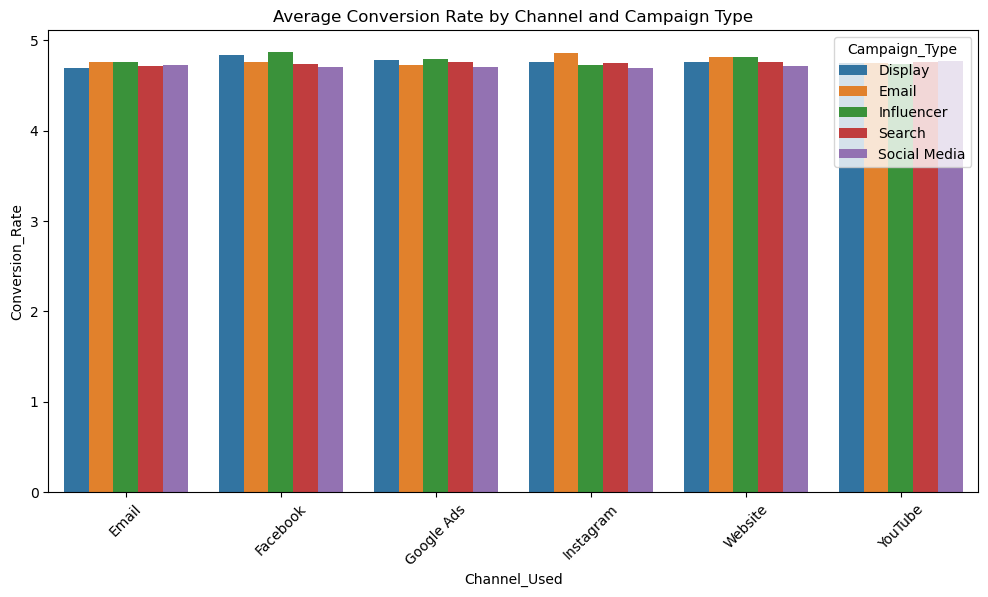

In [43]:
# b) Bar chart
# Average Conversation Rate by Channel and Campaign Type

import seaborn as sns

avg_conv = df.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_conv, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type')
plt.title("Average Conversion Rate by Channel and Campaign Type")
plt.xticks(rotation=45)
plt.show()


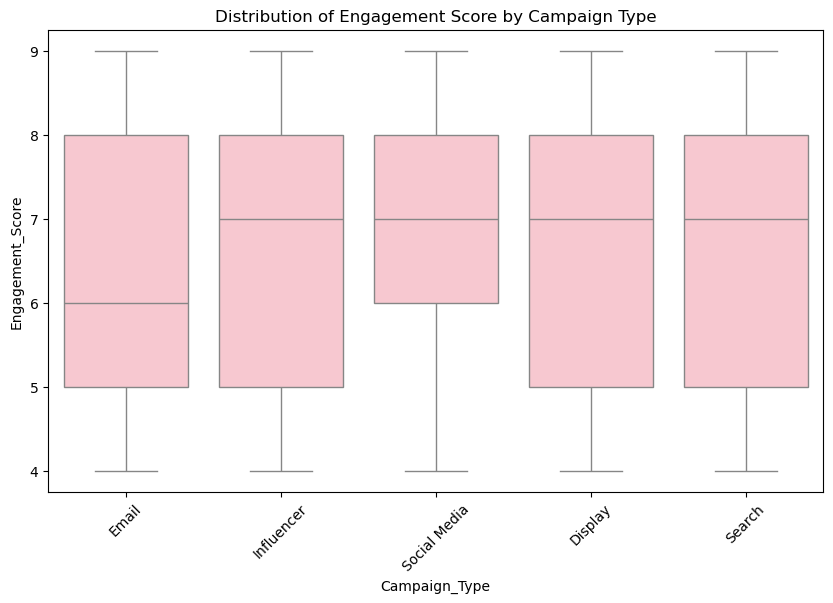

In [44]:
# Box plot

# Distribution of Engagement_Score across different Campaign_Type

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Campaign_Type', y='Engagement_Score',color ='pink')
plt.title("Distribution of Engagement Score by Campaign Type")
plt.xticks(rotation=45)
plt.show()


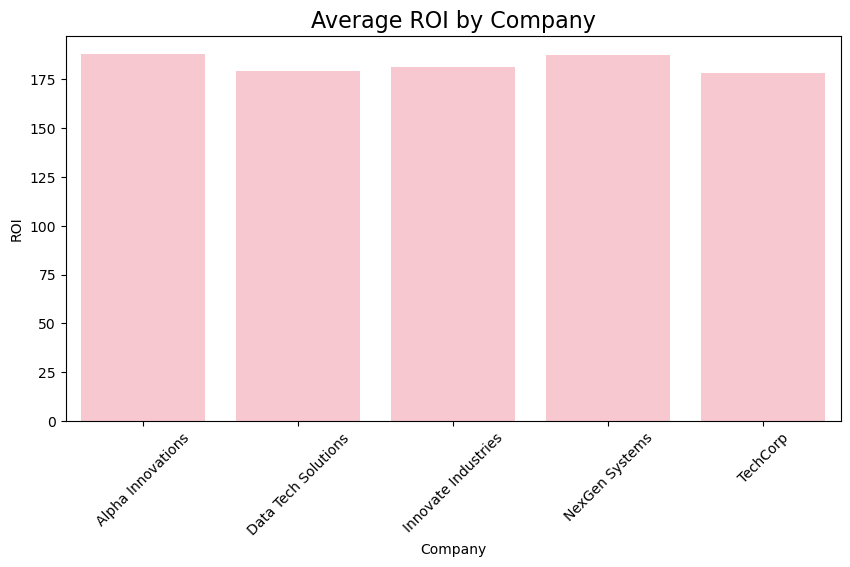

In [45]:
# Bar Chart

# The average ROI by Company
import seaborn as sns
import matplotlib.pyplot as plt

avg_roi_company = df.groupby("Company")["ROI"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_roi_company, x="Company", y="ROI", color = 'pink')
plt.title("Average ROI by Company", fontsize=16)
plt.xticks(rotation=45)
plt.show()


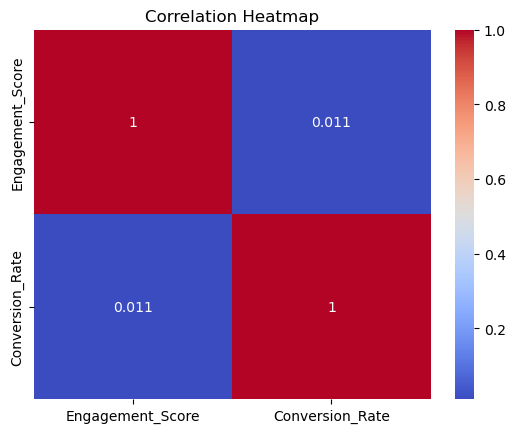

In [46]:
# Heatmap

# Correlation Engagement_Score Vs Conversion_Rate
corr = df[['Engagement_Score', 'Conversion_Rate']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Customer Segmentation

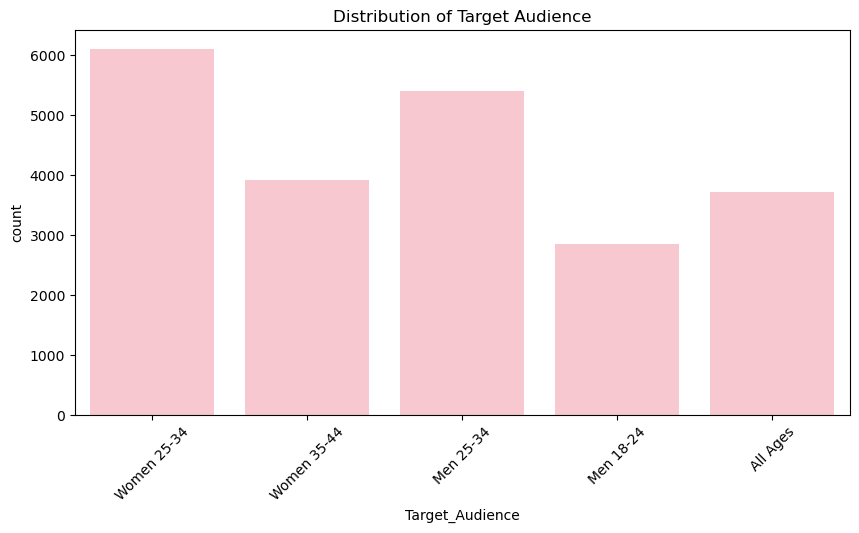

In [47]:
# Count Plot of Target_Audience

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Target_Audience", color ='pink')
plt.title("Distribution of Target Audience")
plt.xticks(rotation=45)
plt.show()

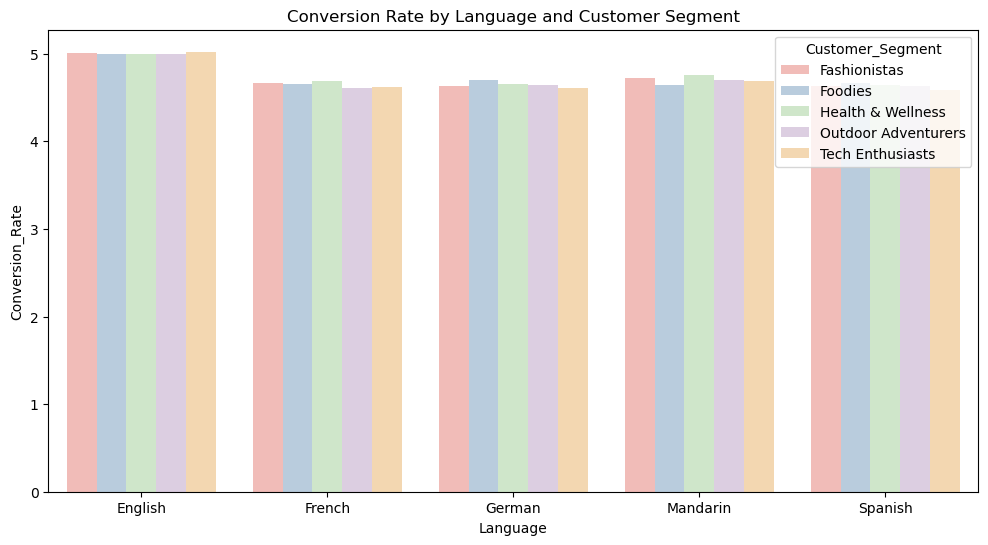

In [48]:
# Bar Chart

# Customer Segment With Highest Conversion Rate per Language 
conv_seg_lang = df.groupby(["Language", "Customer_Segment"])["Conversion_Rate"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=conv_seg_lang, x="Language", y="Conversion_Rate", hue="Customer_Segment", palette="Pastel1")
plt.title("Conversion Rate by Language and Customer Segment")
plt.show()

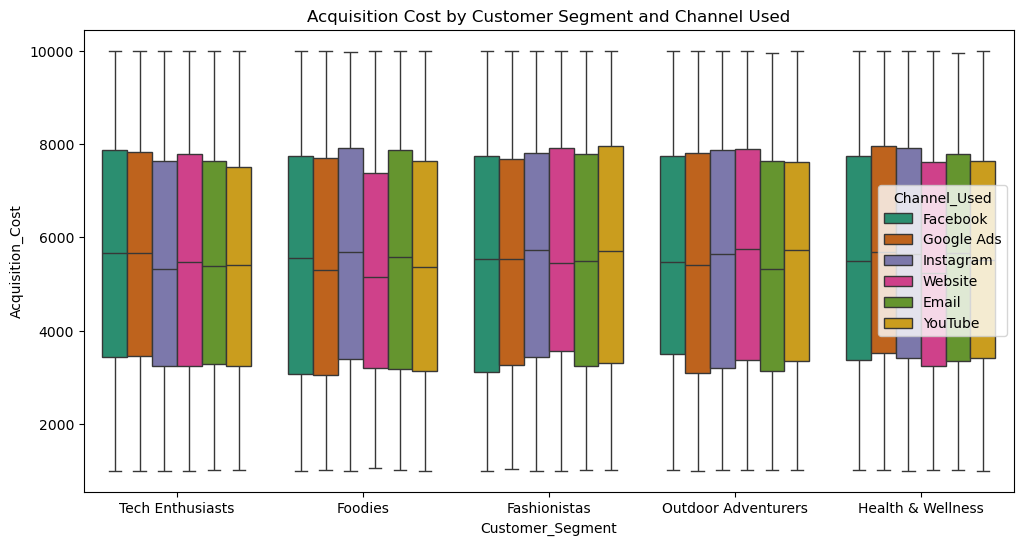

In [49]:
# Box plot

# Acquisition Cost by Customer Segment (Categorized by Channel)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Customer_Segment", y="Acquisition_Cost", hue="Channel_Used", palette="Dark2")
plt.title("Acquisition Cost by Customer Segment and Channel Used")
plt.show()

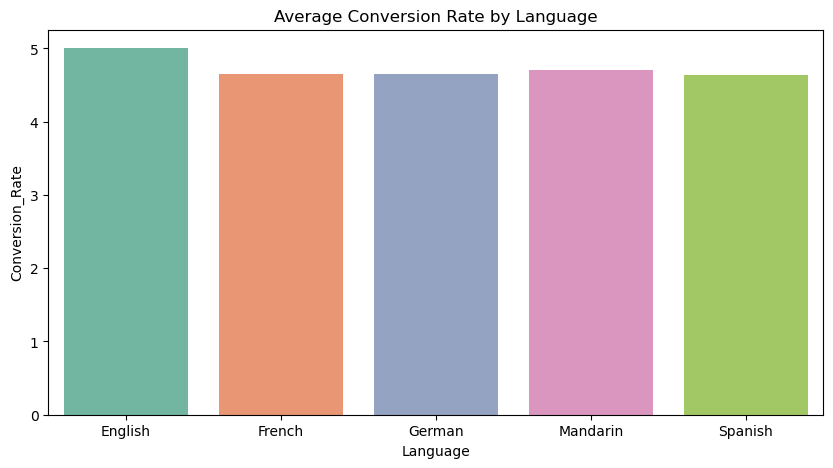

In [50]:
# Bar chart

# Average Conversion Rate by Language
avg_conv_lang = df.groupby("Language")["Conversion_Rate"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=avg_conv_lang,
    x="Language",
    y="Conversion_Rate",
    hue="Language",    
    palette="Set2",     
    legend=False        
)

plt.title("Average Conversion Rate by Language")
plt.show()


# Channel Effectivenes

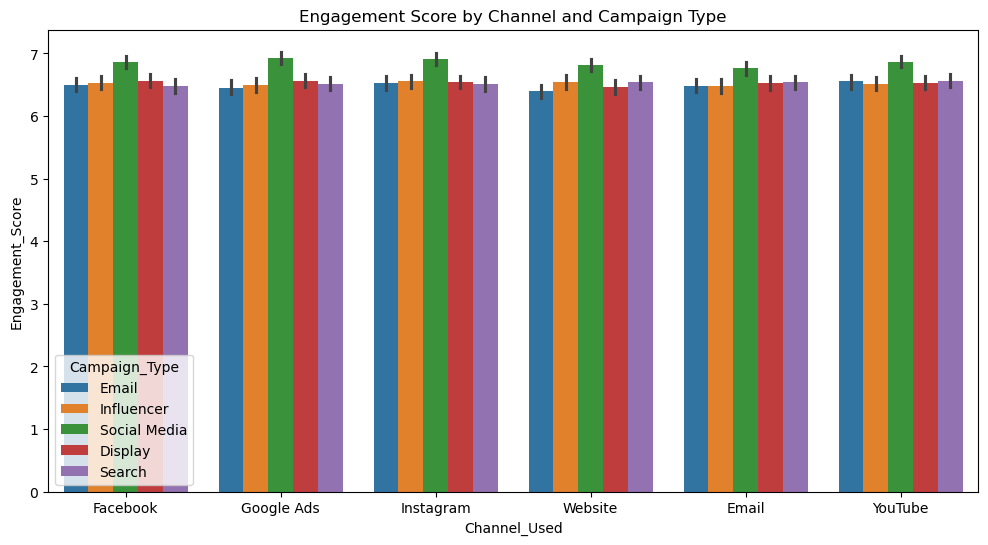

In [51]:
# Bar chart

# Engagement Score for Channels Used (Segmented by Campaign Type)
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Channel_Used", y="Engagement_Score", hue="Campaign_Type", palette ="tab10")
plt.title("Engagement Score by Channel and Campaign Type")
plt.show()


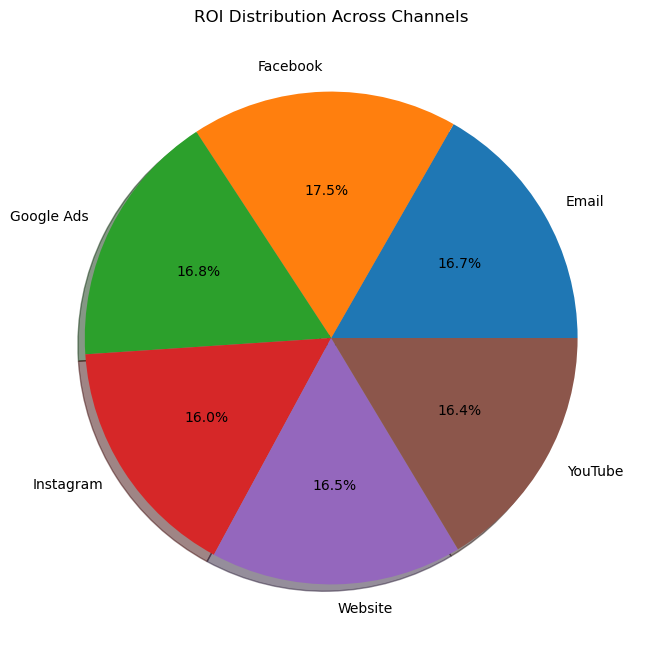

In [52]:
# Pie chart
# Distribution of Total ROI per Channel
roi_channel = df.groupby("Channel_Used")["ROI"].sum()

plt.figure(figsize=(8,8))
plt.pie(roi_channel, labels=roi_channel.index, autopct="%1.1f%%", shadow=True )
plt.title("ROI Distribution Across Channels")
plt.show()


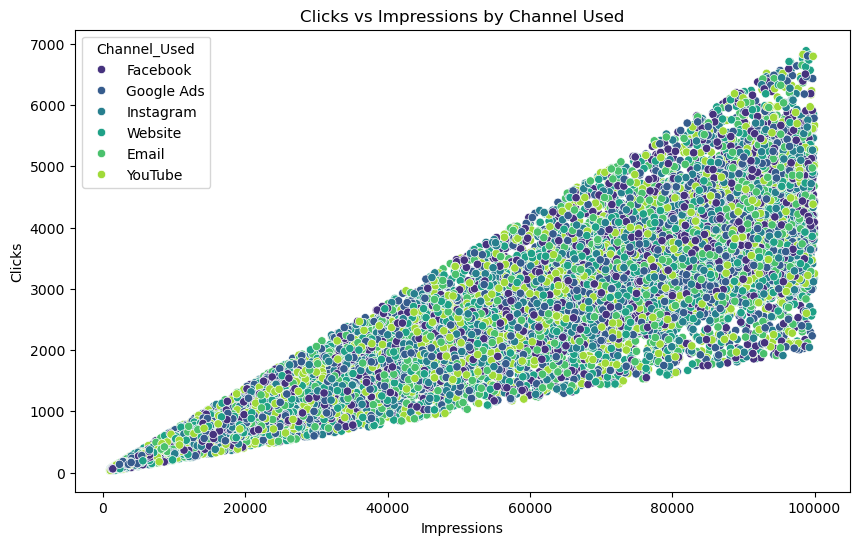

In [53]:
# Scatter Plot
# Clicks vs Impressions for Each Channel
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Impressions", y="Clicks", hue="Channel_Used", palette="viridis")
plt.title("Clicks vs Impressions by Channel Used")
plt.show()


# Time-Based Analysis

In [59]:
# Date column is converted to datetime

df["Date"] = pd.to_datetime(df["Date"], errors='coerce', dayfirst=True)

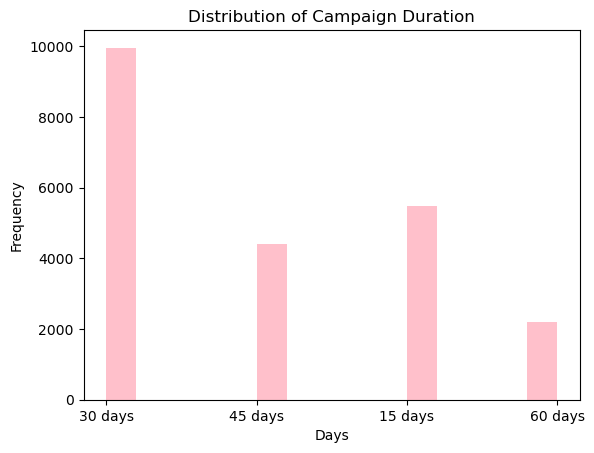

In [62]:
# Histogram of Campaign Duration
plt.hist(df["Duration"], bins=15, color="pink")
plt.title("Distribution of Campaign Duration")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

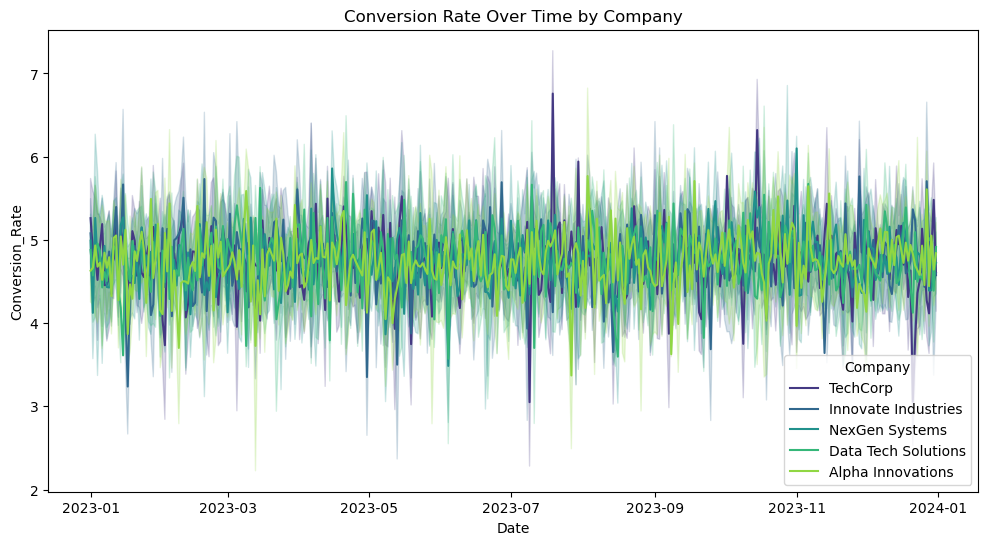

In [66]:
# Line Chart
# Conversion Rate Over Time by Company 
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x="Date",
    y="Conversion_Rate",
    hue="Company",
    palette="viridis"  
)
plt.title("Conversion Rate Over Time by Company")
plt.show()

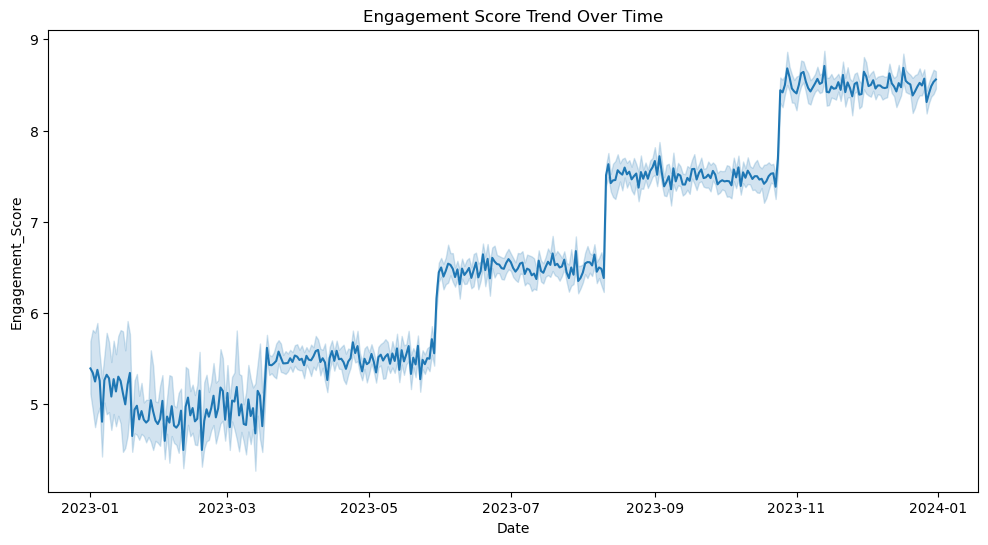

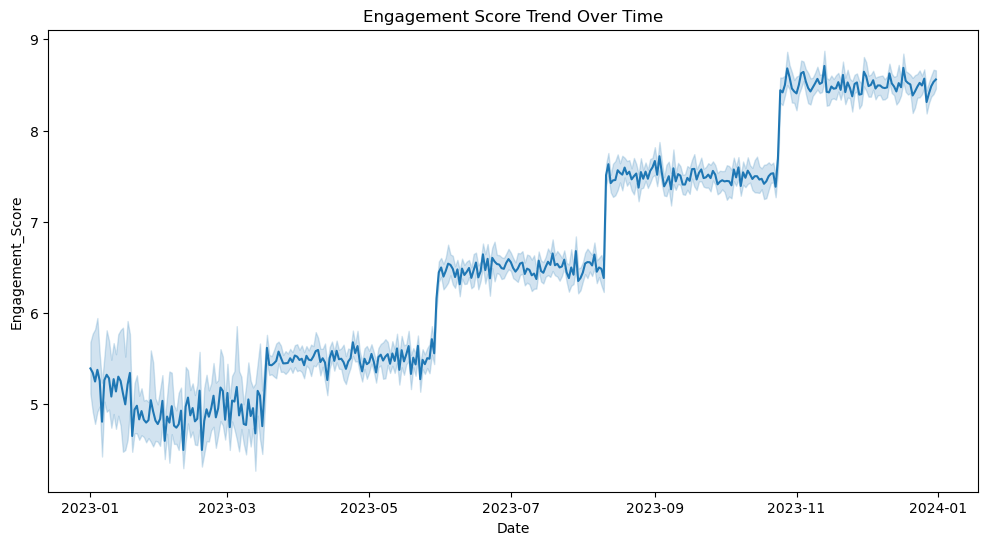

In [69]:
# Line chart
# Trend of Engagement Score Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Engagement_Score")
plt.title("Engagement Score Trend Over Time")
plt.show()
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Engagement_Score")
plt.title("Engagement Score Trend Over Time")
plt.show()

# Geographic Analysis

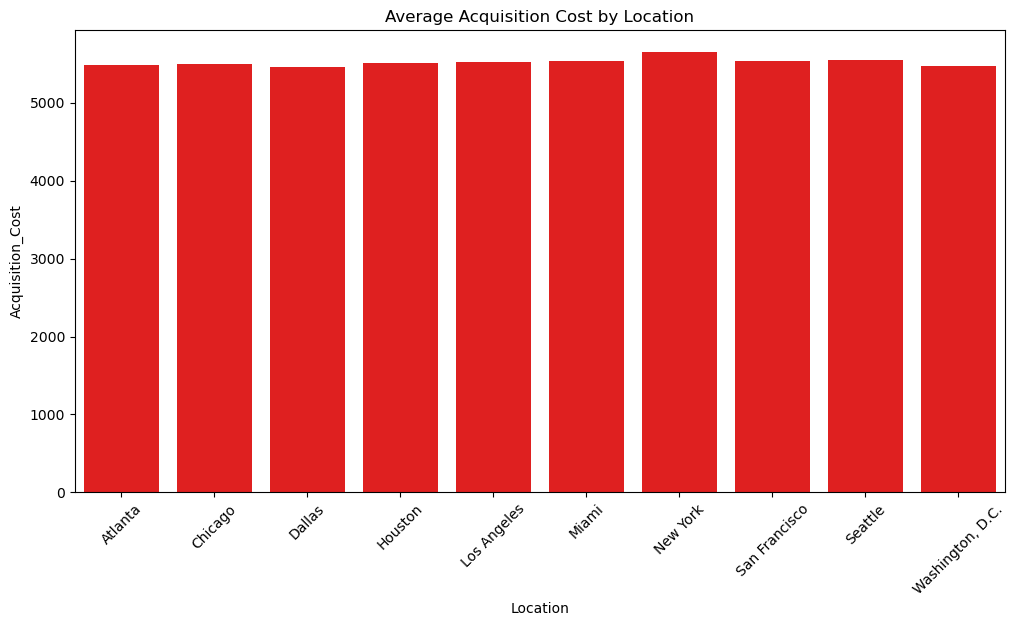

In [75]:
# # Bar chart
# Location With Highest Acquisition Cost
avg_cost_loc = df.groupby("Location")["Acquisition_Cost"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_cost_loc, x="Location", y="Acquisition_Cost",color="red")
plt.title("Average Acquisition Cost by Location")
plt.xticks(rotation=45)
plt.show()

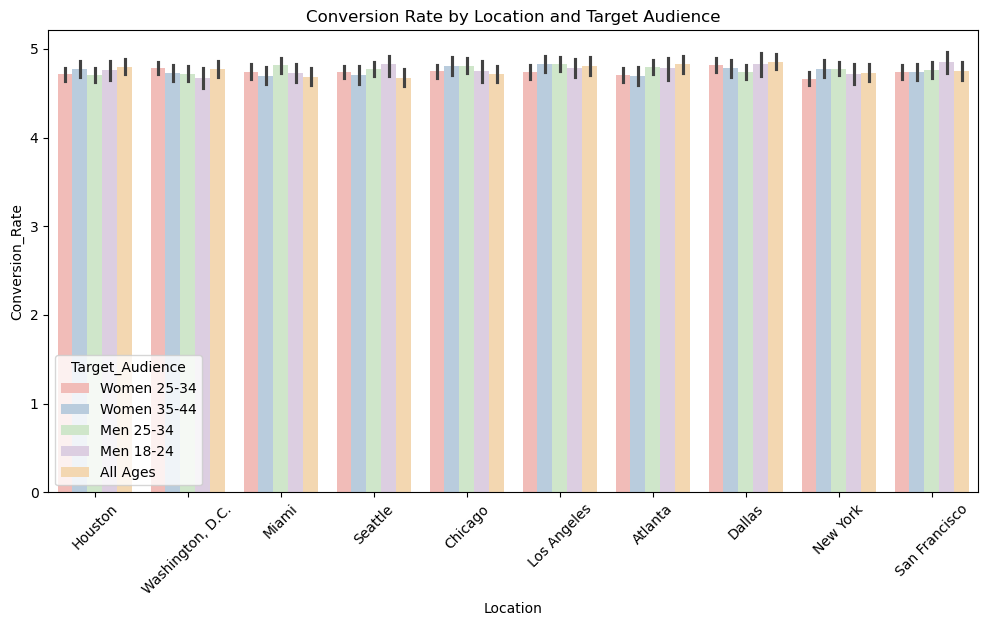

In [73]:
# Bar chart
# Conversion Rate by Location (Categorized by Target Audience)
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Location", y="Conversion_Rate", hue="Target_Audience", palette="Pastel1")
plt.title("Conversion Rate by Location and Target Audience")
plt.xticks(rotation=45)
plt.show()

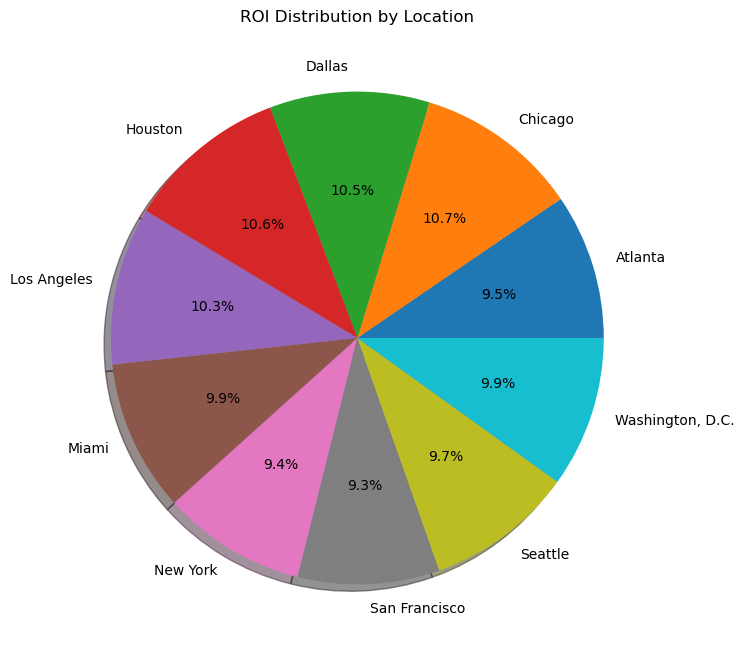

In [76]:
# Pie chart
# ROI by Location
roi_loc = df.groupby("Location")["ROI"].sum()

plt.figure(figsize=(8,8))
plt.pie(roi_loc, labels=roi_loc.index, autopct="%1.1f%%", shadow="True")
plt.title("ROI Distribution by Location")
plt.show()